32.072733877455676
g =  [[-3.24140214  1.1272942 ]]
cost  =  [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
computeCost =  4.515955503078912
**************************************
x 
 [ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303

Text(0.5, 1.0, 'Error vs. Training Epoch')

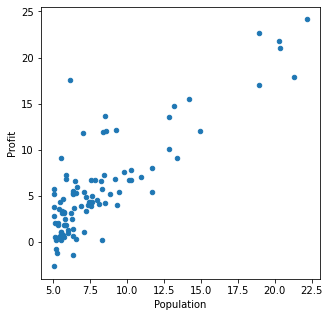

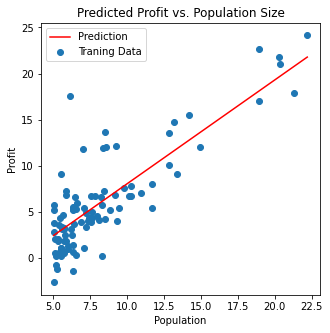

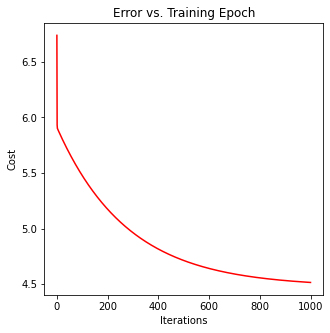

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 29 23:50:41 2022

@author: Galal
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read data
path = "C:\\Users\\Galal\\Downloads\\My-Github\\CV_learning\\Sprint 3\\Sprint 3\\Andrew\\ex1data1.txt"
data = pd.read_csv(path,header=None,names=['Population','Profit'])

#show data details
#print("data = \n",data.head(10))
#print(data.describe())
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))

data.insert(0,'Ones',1)
#print(data.head(10))

#Seperate x(training) from y (target)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#convert from data fram to numpy matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

# cost function
def computeCost(x,y,theta):
    z = np.power(((X*theta.T)-y),2)
    return np.sum(z)/(2*len(X))

print(computeCost(X,y,theta))

#Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

print('g = ' , g)
print('cost  = ' , cost[0:50] )
print('computeCost = ' , computeCost(X, y, g))
print('**************************************')
#=========================================================================

# get best fit line

x = np.linspace(data.Population.min(), data.Population.max(), 100)
print('x \n',x)
print('g \n',g)

f = g[0, 0] + (g[0, 1] * x)
print('f \n',f)




# draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
